## Doing the primary insights

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# reading the dataset and storing them
df_cities = pd.read_csv("../Dataset/dim_cities.csv")
df_respondents = pd.read_csv("../Dataset/dim_repondents.csv")
df_responses = pd.read_csv("../Dataset/fact_survey_responses.csv")

### 1. Demographic Insights (examples) 

#### a. Who prefers energy drink more?  (male/female/non-binary?)

In [3]:
# Q1
df_respondents.head()

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120


In [20]:
df_respondents['Gender'].unique()

array(['Female', 'Male', 'Non-binary'], dtype=object)

In [19]:
df_respondents['Gender'].value_counts()

Gender
Male          6038
Female        3455
Non-binary     507
Name: count, dtype: int64

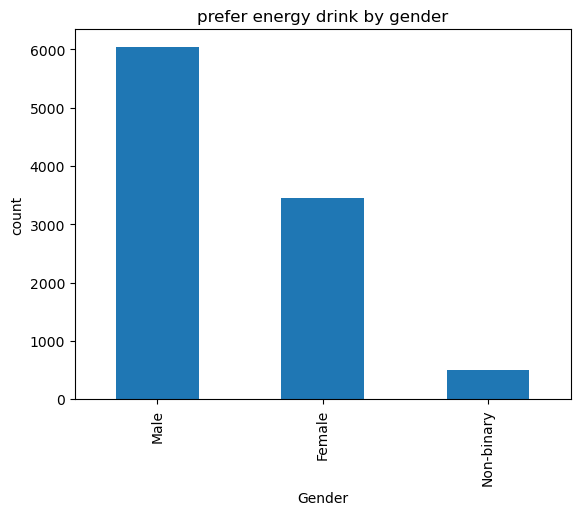

In [14]:
df_respondents['Gender'].value_counts().plot(kind='bar')
plt.title('prefer energy drink by gender')
plt.xlabel('Gender')
plt.ylabel('count')
plt.show()

Male are more who prefer energy drink

#### b. Which age group prefers energy drinks more? 

In [15]:
df_respondents.head()

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113
4,120035,Mohanlal Joshi,19-30,Female,CT120


In [16]:
df_respondents['Age'].unique()

array(['15-18', '19-30', '31-45', '46-65', '65+'], dtype=object)

In [17]:
df_respondents['Age'].value_counts()

Age
19-30    5520
31-45    2376
15-18    1488
46-65     426
65+       190
Name: count, dtype: int64

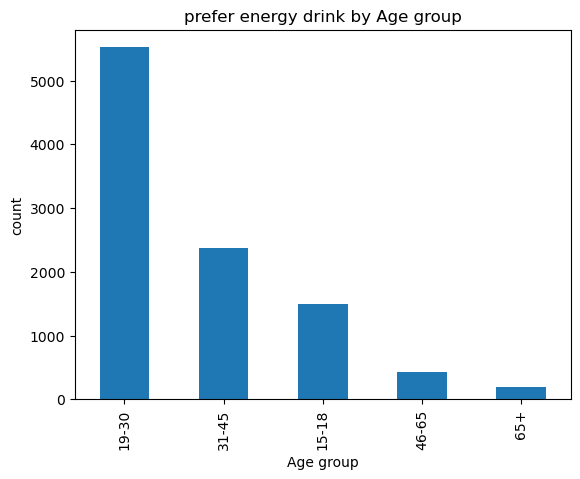

In [21]:
df_respondents['Age'].value_counts().plot(kind='bar')
plt.title('prefer energy drink by Age group')
plt.xlabel('Age group')
plt.ylabel('count')
plt.show()

In conculation the age group of 19-30 prefer the most energy drink

#### c. Which type of marketing reaches the most Youth (15-30)?

In [45]:
df_responses.head(4)

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
3,103004,120034,2-3 times a week,To stay awake during work/study,To boost performance,No,Positive,Dangerous,Yes,5,...,Other,Caffeine,No,Yes,Online ads,Compact and portable cans,No,Above 150,Supermarkets,Sports/exercise


In [46]:
df_respondents.head(4)

,Respondent_ID,Name,Age,Gender,City_ID
0,120031,Aniruddh Issac,15-18,Female,CT117
1,120032,Trisha Rout,19-30,Male,CT118
2,120033,Yuvraj Virk,15-18,Male,CT116
3,120034,Pranay Chand,31-45,Female,CT113


In [59]:
df = df_respondents[df_respondents['Age'].isin(['15-18', '19-30'])].merge(df_responses)['Marketing_channels']

In [60]:
df.value_counts()

Marketing_channels
Online ads            3373
TV commercials        1785
Other                  702
Outdoor billboards     702
Print media            446
Name: count, dtype: int64

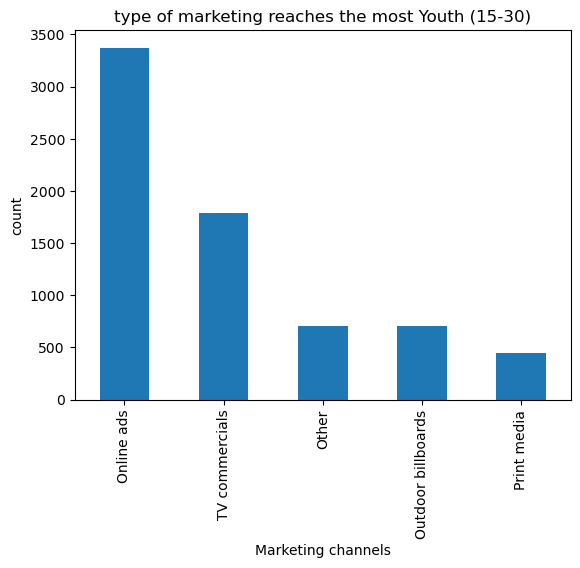

In [62]:
df.value_counts().plot(kind='bar')
plt.title('type of marketing reaches the most Youth (15-30)')
plt.xlabel('Marketing channels')
plt.ylabel('count')
plt.show()

online ads are best marketing to reaches most Youth (15-30)

### 2. Consumer Preferences: 

#### a. What are the preferred ingredients of energy drinks among respondents? 

In [65]:
df_responses['Ingredients_expected'].value_counts()

Ingredients_expected
Caffeine    3896
Vitamins    2534
Sugar       2017
Guarana     1553
Name: count, dtype: int64

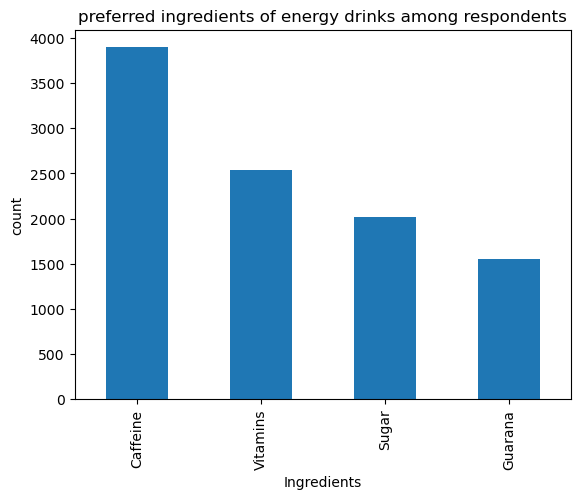

In [66]:
df_responses['Ingredients_expected'].value_counts().plot(kind='bar')
plt.title('preferred ingredients of energy drinks among respondents')
plt.xlabel('Ingredients')
plt.ylabel('count')
plt.show()

In conlusion caffeine is the preferred ingredient of enery drinks among respondents

#### b. What packaging preferences do respondents have for energy drinks?

In [68]:
df_responses.head(2)

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise


In [74]:
df_responses['Packaging_preference'].value_counts()

Packaging_preference
Compact and portable cans    3984
Innovative bottle design     3047
Collectible packaging        1501
Eco-friendly design           983
Other                         485
Name: count, dtype: int64

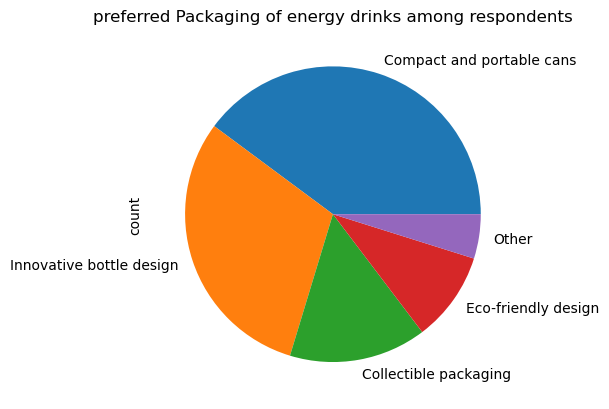

In [75]:
df_responses['Packaging_preference'].value_counts().plot(kind='pie')
plt.title('preferred Packaging of energy drinks among respondents')
plt.show()

### 3. Competition Analysis: 

#### a. Who are the current market leaders? 

In [4]:
df_responses.head(2)

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
1,103002,120032,2-3 times a month,Throughout the day,To boost performance,No,Neutral,Not sure,No,5,...,More natural ingredients,Caffeine,Yes,Not Sure,Print media,Compact and portable cans,No,50-99,Supermarkets,Sports/exercise


In [5]:
df_responses['Current_brands'].value_counts()

Current_brands
Cola-Coka    2538
Bepsi        2112
Gangster     1854
Blue Bull    1058
CodeX         980
Sky 9         979
Others        479
Name: count, dtype: int64

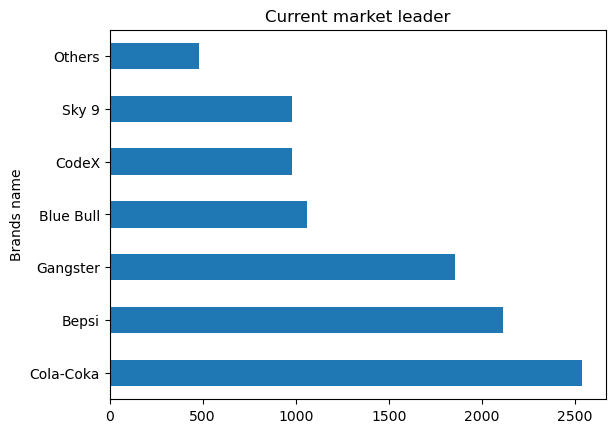

In [7]:
df_responses['Current_brands'].value_counts().plot(kind='barh')
plt.title('Current market leader')
plt.ylabel('Brands name')
plt.show()

We can see cola-coka is the brands which is perfered or consume by most respondent which in trun make it a market leader

#### b. What are the primary reasons consumers prefer those brands over ours?

In [20]:
df = df_responses[df_responses['Current_brands'] == 'Cola-Coka']['Reasons_for_choosing_brands'].value_counts()
df

Reasons_for_choosing_brands
Brand reputation           616
Taste/flavor preference    531
Availability               510
Other                      448
Effectiveness              433
Name: count, dtype: int64

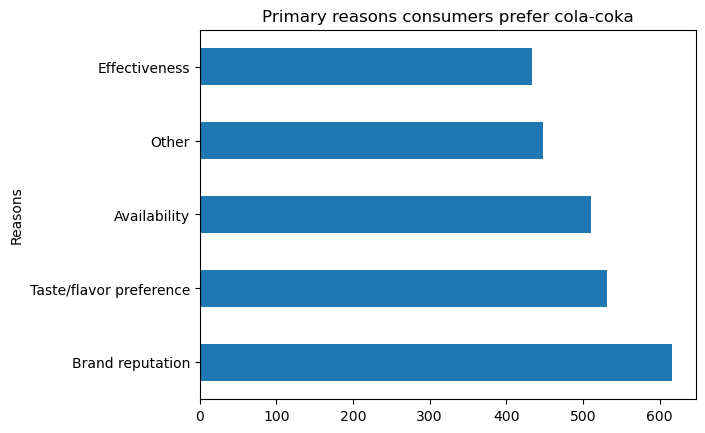

In [22]:
df.plot(kind='barh')
plt.title('Primary reasons consumers prefer cola-coka')
plt.ylabel('Reasons')
plt.show()

The brand reputation is the main causes cola-coka is primary reasons consumers prefer it over ours

### 4. Marketing Channels and Brand Awareness: 

#### a. Which marketing channel can be used to reach more customers? 

In [29]:
df = df_responses['Marketing_channels'].value_counts().idxmax()
df

'Online ads'

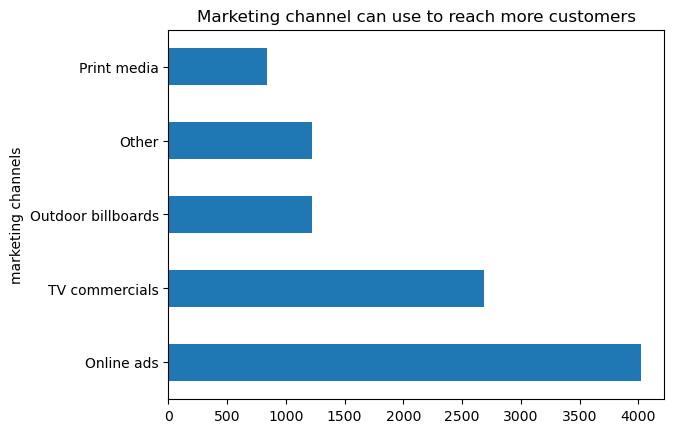

In [28]:
df.plot(kind='barh')
plt.title('Marketing channel can use to reach more customers')
plt.ylabel('marketing channels')
plt.show()

To reach more customers we can use online ads as it has being most of the customers

#### b. How effective are different marketing strategies and channels in reaching our customers?

In [12]:
df_merged = df_responses.merge(df_respondents[['Respondent_ID', 'Age', 'City_ID']], on='Respondent_ID') \
                        .merge(df_cities[['City_ID', 'Tier']], on='City_ID')

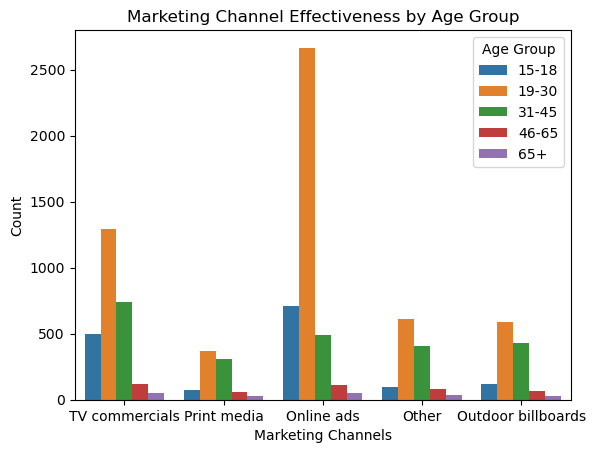

In [14]:
sns.countplot(data=df_merged, x='Marketing_channels', hue='Age')
plt.title('Marketing Channel Effectiveness by Age Group')
plt.xlabel('Marketing Channels')
plt.ylabel('Count')

plt.legend(title='Age Group')

plt.show()

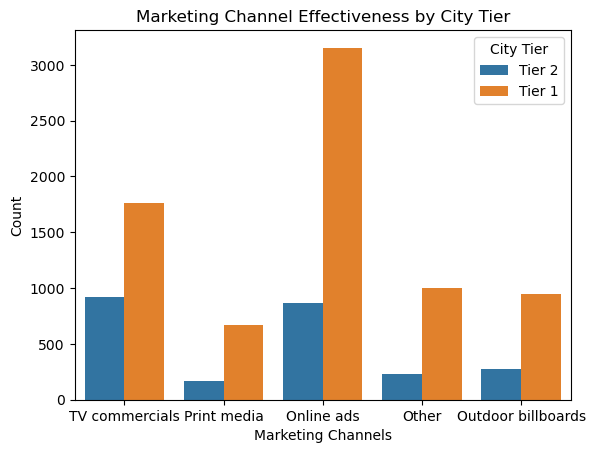

In [15]:
sns.countplot(data=df_merged, x='Marketing_channels', hue='Tier')
plt.title('Marketing Channel Effectiveness by City Tier')
plt.xlabel('Marketing Channels')
plt.ylabel('Count')

plt.legend(title='City Tier')

plt.show()

By seeing the graph online ads are most effective in different city tier and by age group as well

### 5. Brand Penetration: 

#### a. What do people think about our brand? (overall rating)

<AxesSubplot:xlabel='Brand_perception'>

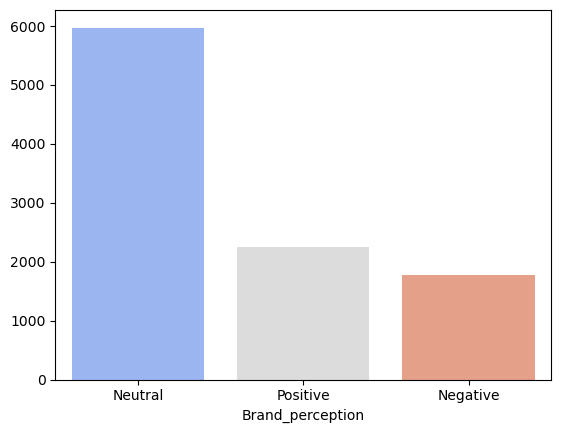

In [19]:
perception_counts = df_responses['Brand_perception'].value_counts()
sns.barplot(x=perception_counts.index, y=perception_counts.values, palette='coolwarm')


The overall rating is neutral for the brand

#### b. Which cities do we need to focus more on?

In [30]:
df = df_respondents.merge(df_cities[['City_ID', 'City']], on='City_ID')['City'].value_counts()
df.head()

City
Bangalore    2828
Hyderabad    1833
Mumbai       1510
Chennai       937
Pune          906
Name: count, dtype: int64

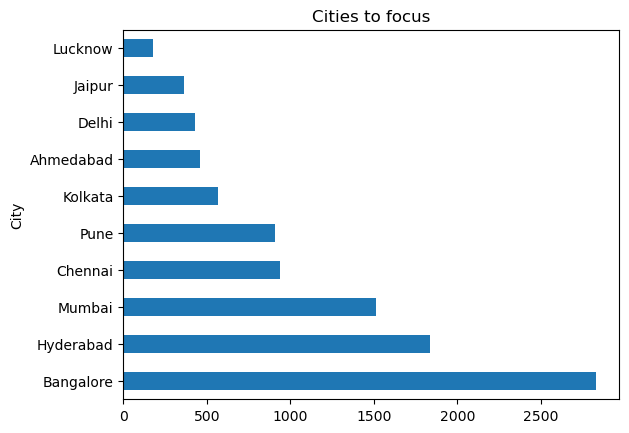

In [29]:
df.plot(kind='barh')

plt.title('Cities to focus')

plt.show()

The city to focus more is Lucknow city.

### 6. Purchase Behavior: 

#### a. Where do respondents prefer to purchase energy drinks? 

In [32]:
df_responses['Purchase_location'].value_counts()

Purchase_location
Supermarkets                4494
Online retailers            2550
Gyms and fitness centers    1464
Local stores                 813
Other                        679
Name: count, dtype: int64

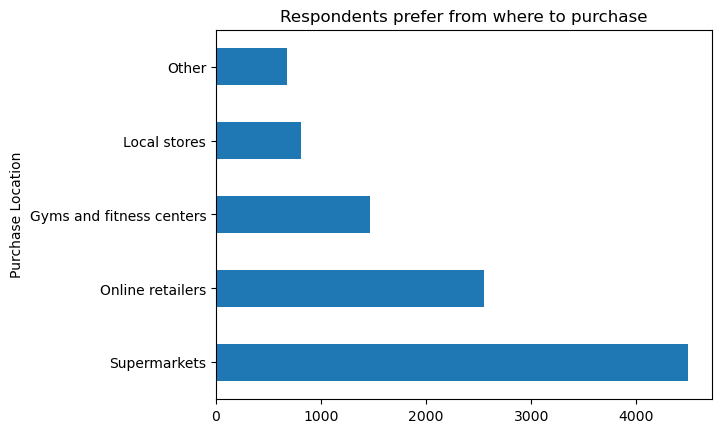

In [34]:
df_responses['Purchase_location'].value_counts().plot(kind='barh')

plt.title('Respondents prefer from where to purchase')

plt.ylabel('Purchase Location')
plt.show()

Most of the respondents prefer supermarkets to purchase energy drink

#### b. What are the typical consumption situations for energy drinks among respondents? 

In [37]:
df_responses['Typical_consumption_situations'].value_counts()

Typical_consumption_situations
Sports/exercise           4494
Studying/working late     3231
Social outings/parties    1487
Other                      491
Driving/commuting          297
Name: count, dtype: int64

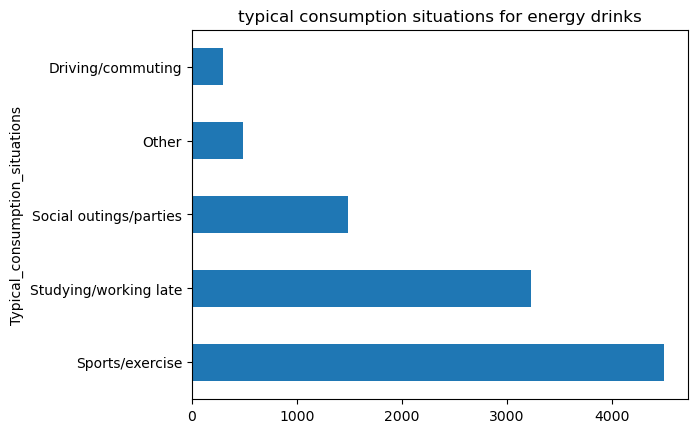

In [38]:
df_responses['Typical_consumption_situations'].value_counts().plot(kind='barh')

plt.title('typical consumption situations for energy drinks')

plt.show()

Typical consumption situations to drinks energy drinks is while sports/exercise

#### c. What factors influence respondents' purchase decisions, such as price range and limited edition packaging?

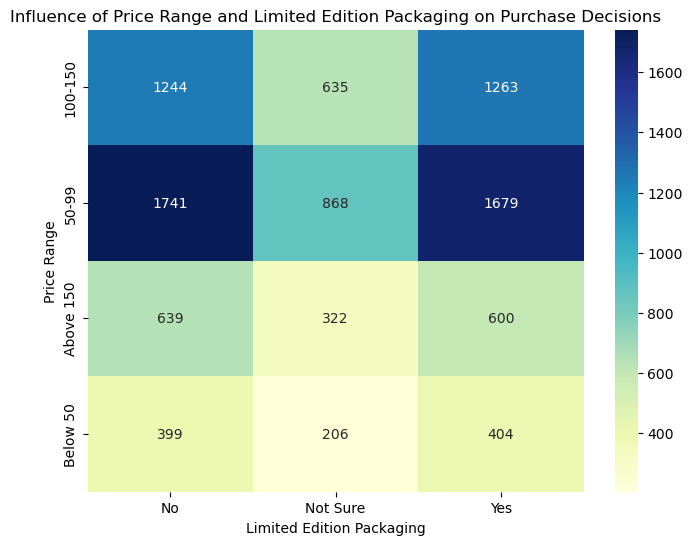

In [42]:

# Group by relevant factors and calculate the counts
influence_factors = df_responses.groupby(['Price_range', 'Limited_edition_packaging']).size().reset_index(name='Count')

# Plot a heatmap to show the influence of these factors on purchase decisions
pivot_table = influence_factors.pivot(index='Price_range', columns='Limited_edition_packaging', values='Count')


plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')

# Add title and labels
plt.title('Influence of Price Range and Limited Edition Packaging on Purchase Decisions')
plt.xlabel('Limited Edition Packaging')
plt.ylabel('Price Range')

# Show plot
plt.show()


We can see there is a influence of limited edition packing on price range from the heatmap

### 7. Product Development 

#### a. Which area of business should we focus more on our product development? (Branding/taste/availability)

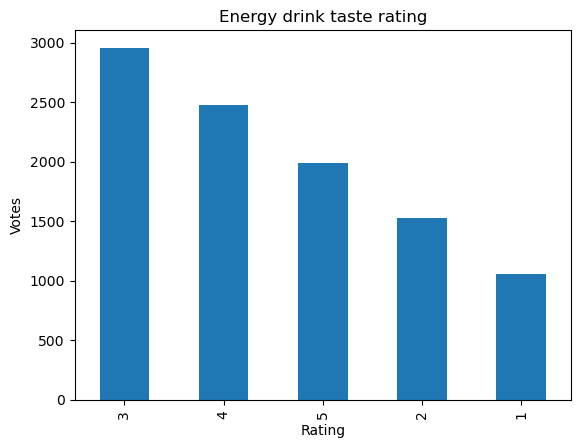

In [50]:
df_responses['Taste_experience'].value_counts().plot(kind='bar')
plt.title('Energy drink taste rating')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.show()

In [54]:
df = df_responses[df_responses['Reasons_preventing_trying'].isin(['Not available locally', 'Unfamiliar with the brand'])]
df.head()

,Response_ID,Respondent_ID,Consume_frequency,Consume_time,Consume_reason,Heard_before,Brand_perception,General_perception,Tried_before,Taste_experience,...,Improvements_desired,Ingredients_expected,Health_concerns,Interest_in_natural_or_organic,Marketing_channels,Packaging_preference,Limited_edition_packaging,Price_range,Purchase_location,Typical_consumption_situations
0,103001,120031,2-3 times a week,To stay awake during work/study,Increased energy and focus,Yes,Neutral,Not sure,No,5,...,Reduced sugar content,Guarana,No,Yes,TV commercials,Compact and portable cans,Yes,50-99,Supermarkets,Studying/working late
2,103003,120033,Rarely,Before exercise,Increased energy and focus,No,Neutral,Not sure,No,2,...,More natural ingredients,Caffeine,No,Yes,Online ads,Innovative bottle design,Not Sure,100-150,Supermarkets,Studying/working late
7,103008,120038,Rarely,Before exercise,To combat fatigue,No,Neutral,Healthy,Yes,4,...,Reduced sugar content,Sugar,Yes,Not Sure,Online ads,Compact and portable cans,Yes,50-99,Gyms and fitness centers,Social outings/parties
8,103009,120039,Once a week,To stay awake during work/study,To enhance sports performance,No,Neutral,Effective,Yes,3,...,Reduced sugar content,Sugar,No,Yes,Other,Innovative bottle design,No,100-150,Other,Sports/exercise
11,103012,120042,Rarely,To stay awake during work/study,To combat fatigue,Yes,Neutral,Dangerous,No,2,...,Reduced sugar content,Caffeine,Yes,Yes,Online ads,Other,Yes,100-150,Online retailers,Social outings/parties


In [55]:
df['Reasons_preventing_trying'].value_counts()

Reasons_preventing_trying
Not available locally        2431
Unfamiliar with the brand    1850
Name: count, dtype: int64

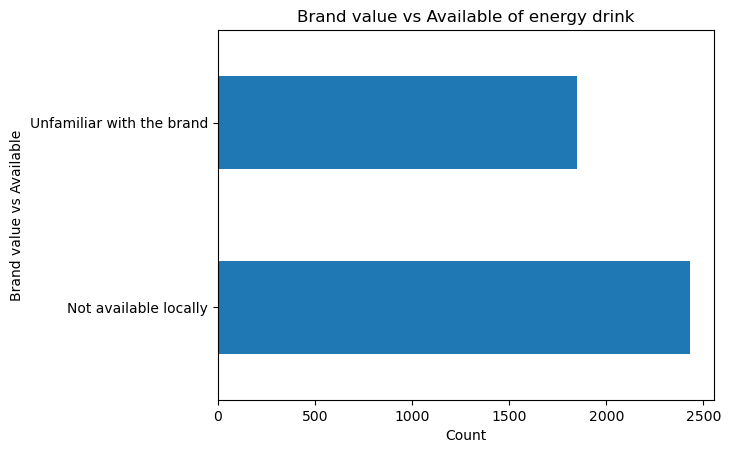

In [58]:
df['Reasons_preventing_trying'].value_counts().plot(kind='barh')
plt.title('Brand value vs Available of energy drink')
plt.ylabel('Brand value vs Available')
plt.xlabel('Count')
plt.show()

In conclusion first we should work on Availablity as it clearly see most responsdent has raise this issue then taste as overall rating is avager so we should market to have a strong brand to have more taste review

### 